## MACS30000 Assignment 7: Exploring the GSS (Writeup)
### Leoson Hoay
### November 27 2017

**Importing necessary packages:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gss_df = pd.read_csv("../../assignments/exploratory-data-analysis/data/gss2012.csv")

----

## Introduction

The EDA performed on the GSS Social Survey and denoted on the other notebook was done in an almost-whimsical fashion, scanning through the plethora of variables like a dolphin echolocating itself in unknown waters. However, in the process, patterns began to emerge. The GSS survey data has equally fascinating opinion data and demographical data, and during my EDA, I seemed to tend more towards exploring the relationships between the demographical indicators (with the exception of political views and happiness). From the exploration, four main points of interest were particularly resonant. The first is regarding the distribution of perceptions towards pre-marital intercourse. The second is the observable patterns between educational level attainment and reading of the news. The third has to do with the distribution of reported political views. Lastly, the relationship between marriage status and reported happiness is also an interesting site for further examination. 

## Perceptions towards pre-marital intercourse

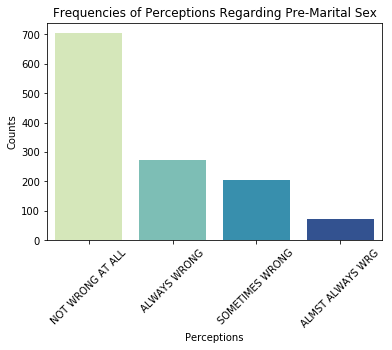

In [3]:
%matplotlib inline
cp_premars = sns.countplot(x="premarsx", data=gss_df, palette = "YlGnBu")
cp_premars.set(title = "Frequencies of Perceptions Regarding Pre-Marital Sex", xlabel='Perceptions', ylabel='Counts')
for item in cp_premars.get_xticklabels():
    item.set_rotation(45)

A cursory glance at the seaborn plot reveals that the general social perception of pre-marital intercourse tends towards the attitude that there is nothing wrong with it. However, it was of interest to me that the "Almost" and "Sometimes Wrong" options were slightly less popular than the other extreme, "Always Wrong". To explore this further, we can look at this seaborn stripplot:

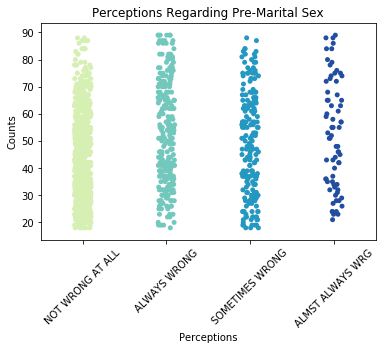

In [4]:
sp_premars_age = sns.stripplot(x = "premarsx", y = "age", data = gss_df, jitter = True, palette = "YlGnBu")
sp_premars_age.set(title = "Perceptions Regarding Pre-Marital Sex", xlabel='Perceptions', ylabel='Counts')
for item in sp_premars_age.get_xticklabels():
    item.set_rotation(45)

From the dispersion, there is an observable similarity in clustering within both the "Not Wrong at all" options and the "Always Wrong option", implying that individuals tended to the extreme options. There are two possibilities here. Individuals could be motivated by social desirability bias to indicate either extreme - which depending on their inherent values regarding sexual intercourse may align more closely with the kind of person they would want to present themselves as. The second possibility is that the question scale itself is in want of better design - whether pre-marital sex is wrong or not seems like a question where it is difficult to conceive a middle ground, hence the middle options may not make much sense in the context of the survey. 

## Educational Level Attainment and News Reading

The attainment of a particular level of education is not only attributed to one's ability, but is known to be subject to many external factors including SES and other environmental indicators. An exploration of the abovementioned versus news reading habits may provoke some thoughts regarding possible areas of investigation.

Text(0.5,0.98,'News Reading Habits by Educational Attainment')

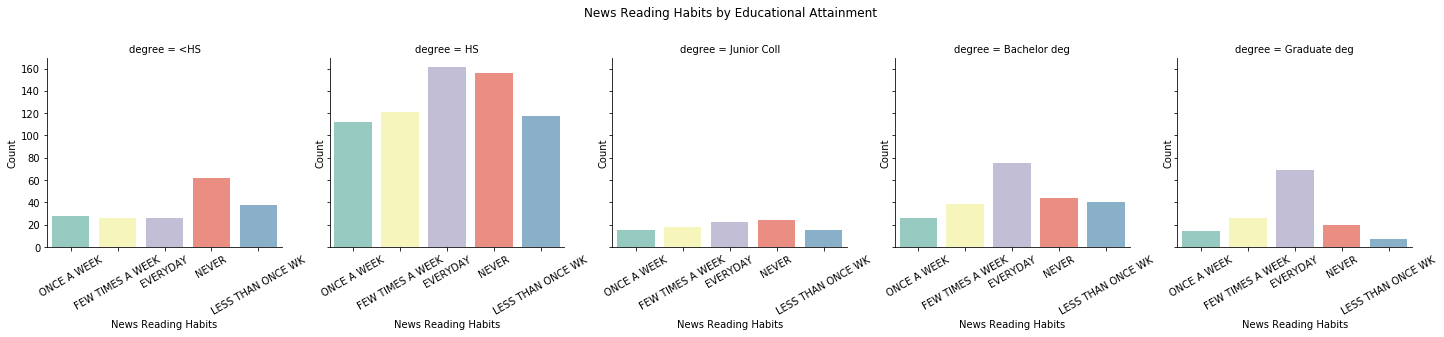

In [5]:
ax = sns.factorplot(col_wrap = 5, x="news", col = "degree",
                    col_order=['<HS', 'HS', 'Junior Coll', 'Bachelor deg', 'Graduate deg'],
                    data=gss_df, kind="count", size = 4, sharex = False, palette = "Set3")
ax.set(xlabel='News Reading Habits', ylabel='Count')
ax.set_xticklabels(rotation=30)
plt.subplots_adjust(top=0.8)
ax.fig.suptitle("News Reading Habits by Educational Attainment")

We can observe under each category that the respondents that attain a lower degree level trend toward a greater proportion of "Never" reading the news, especially in the category of respondents that did not attain a high school degree. Poignant questions to explore are abound. For example, what is the "news" that the survey respondents report reading? Are they reliable sources of news? Do these sources differ by different education attainment level? Is it possible that the same environmental factors that contribute to the respondents' not being able to attain a high school degree also restricts their access to news reading?

## Distribution of Reported Political Views

Political views can be deeply personal and many individuals are often invested both emotionally and mentally in what they believe in. The following is the overall distribution of reported political views in the survey:

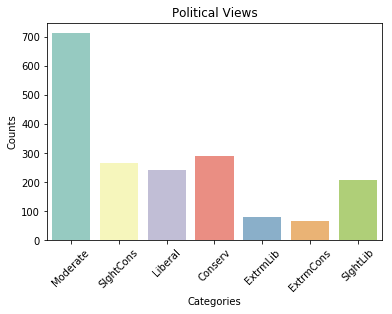

In [6]:
cp_polviews = sns.countplot(x="polviews", data=gss_df, palette = "Set3")
cp_polviews.set(title = "Political Views", xlabel='Categories', ylabel='Counts')
for item in cp_polviews.get_xticklabels():
    item.set_rotation(45)

From the distribution, we see that "Moderate" is the mode, the most popular choice. In addition, I also grouped these views by educational attainment:

Text(0.5,0.98,'Political Views by Educational Attainment')

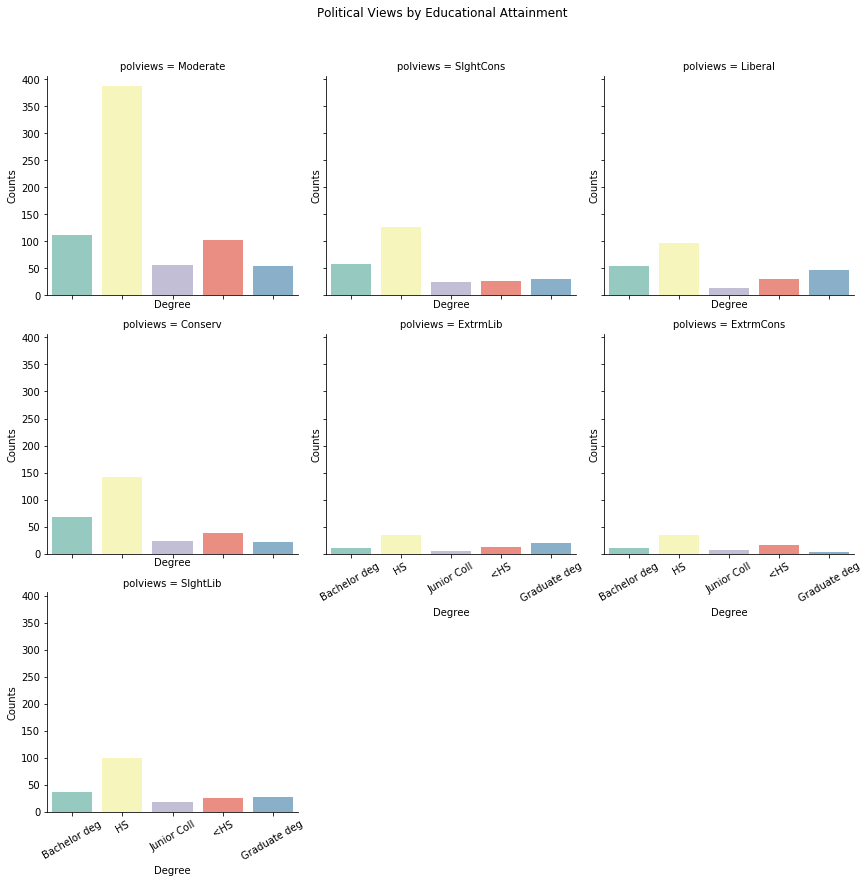

In [7]:
ax = sns.factorplot(col_wrap = 3, x="degree", col = "polviews",
                    col_order=['Moderate','SlghtCons','Liberal','Conserv', 'ExtrmLib', 'ExtrmCons', 'SlghtLib'],
                    data=gss_df, kind="count", size = 4, sharex = True, palette = "Set3")
ax.set(xlabel='Degree', ylabel='Counts');
ax.set_xticklabels(rotation=30)
plt.subplots_adjust(top=0.9)
ax.fig.suptitle("Political Views by Educational Attainment")

While there are some distributionary differences between the different reported political views, "Moderate" still holds the relative majority in all educational attainment categories. Is this due to an unwillingness to report their "true views" or simply a reflection of the fact that many individuals are unsure/apathetic regarding their own political opinions?

## Marriage Status and Reported Happiness

Text(0.5,0,'Marital Status')

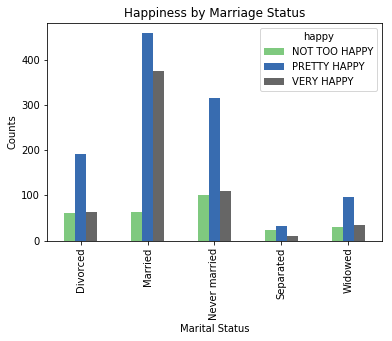

In [8]:
bar_marriage = gss_df.groupby(['marital', 'happy']).size().unstack().plot.bar(colormap = "Accent", title = "Happiness by Marriage Status")
plt.ylabel('Counts')
plt.xlabel('Marital Status')

It is especially interesting to note that the largest proportion of respondents who report being "Very Happy" are in the "Married" group. While most survey respondents report being "Pretty Happy", the "Married" group has a marked difference in the proportion of individuals who report being "Very Happy" as opposed to the other groups. While this is obviously not in opposition to the purported emotional condition that marriage is supposed to bestow, it still begs the question as to what proportion of this response is once again due to some form of desirability bias or confirmation bias. 

However, whether or not biases exist, if a correlation is properly established between marriage and reported happiness - it would be a useful insight for policymakers or social workers whose goal is to advocate marriage, or perhaps more importantly, staying in one. 